In [2]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df=pd.read_csv("missile_trajectory_dataset_with_both_angles.csv")
X = df[['x0', 'y0', 'x1', 'y1', 'delta_t']]   # input features
y = df[['x_impact','t_impact']] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
Score=rf.score(X_test, y_test)
print(f"Score is: {Score} for this data")


               

Score is: 0.999873809996705 for this data


In [4]:
#Interceptor logic
#Note:The interceptor fires a missile in a straight line and we will predict if interception is possible or not.
# Predict on test data
y_pred = rf.predict(X_test)
# Interceptor parameters
v_interceptor=300  # m/s (example speed)
t_setup=4          # seconds to set up and fire(you can change this)

#Loop through a few predictions and apply interceptor logic
for i in range(10):  # test first 10 examples
    x_impact_pred = y_pred[i][0]
    t_impact_pred = y_pred[i][1]
    #Time window after setup
    intercept_window = t_impact_pred - t_setup
    #Distance from interceptor at (0, 0) to predicted x_impact (ground level assumed)
    distance_to_cover = abs(x_impact_pred)
    t_needed = distance_to_cover / v_interceptor

    print(f"\nSample {i+1}:")
    print(f"Predicted x_impact = {x_impact_pred:.2f} m")
    print(f"Predicted t_impact = {t_impact_pred:.2f} s")
    print(f"Interceptor needs {t_needed:.2f} s to reach")

    if intercept_window > 0 and t_needed <= intercept_window:
        print("Interception Possible")
    else:
        print("Interception NOT Possible")

#Storing the values in a csv file
count_Success=0
results=[]
for j in range(len(y_pred)):
    x_impact_pred = y_pred[j][0]
    t_impact_pred = y_pred[j][1]
    intercept_window = t_impact_pred-t_setup
    distance_to_cover = abs(x_impact_pred)
    t_needed = distance_to_cover / v_interceptor
    
    if intercept_window >= t_needed:
        result = 'Possible'
        count_Success += 1
    else:
        result = 'Not possible'

    # Append data for this sample
    results.append({
        'x_impact_pred': x_impact_pred,
        't_impact_pred': t_impact_pred,
        'intercept_window': intercept_window,
        'distance_to_cover': distance_to_cover,
        't_needed': t_needed,
        'Interception': result
    })

# Convert to DataFrame
interception_df = pd.DataFrame(results)

# Save to CSV
interception_df.to_csv("interceptor_results.csv", index=False)

print("Interception results saved to 'interceptor_results.csv'")
    




Sample 1:
Predicted x_impact = -1359.05 m
Predicted t_impact = 19.26 s
Interceptor needs 4.53 s to reach
Interception Possible

Sample 2:
Predicted x_impact = 5981.17 m
Predicted t_impact = 44.82 s
Interceptor needs 19.94 s to reach
Interception Possible

Sample 3:
Predicted x_impact = 1979.83 m
Predicted t_impact = 22.40 s
Interceptor needs 6.60 s to reach
Interception Possible

Sample 4:
Predicted x_impact = 4791.54 m
Predicted t_impact = 19.80 s
Interceptor needs 15.97 s to reach
Interception NOT Possible

Sample 5:
Predicted x_impact = 8393.69 m
Predicted t_impact = 44.22 s
Interceptor needs 27.98 s to reach
Interception Possible

Sample 6:
Predicted x_impact = -949.54 m
Predicted t_impact = 17.37 s
Interceptor needs 3.17 s to reach
Interception Possible

Sample 7:
Predicted x_impact = 7286.62 m
Predicted t_impact = 27.70 s
Interceptor needs 24.29 s to reach
Interception NOT Possible

Sample 8:
Predicted x_impact = -3475.62 m
Predicted t_impact = 23.49 s
Interceptor needs 11.59 s 

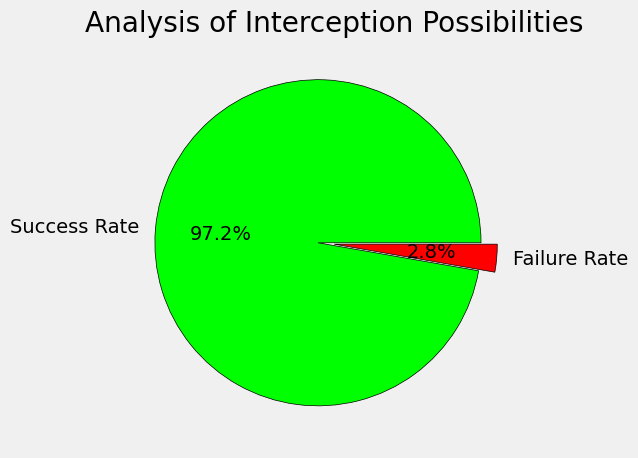

In [8]:
#Plotting the results in a pie chart
#calculating percentages
success_rate = (count_Success/2000)*100
failure_rate = 100 - success_rate
#creating the pie chart
plt.style.use('fivethirtyeight')
slices = [success_rate,failure_rate]
labels = ['Success Rate','Failure Rate']
colors = ['#00FF00', '#FF0000'] 
explode = [0.1,0]
plt.pie(slices,labels=labels,colors=colors,wedgeprops={'edgecolor':'black'},explode=explode,autopct='%1.1f%%')
plt.title('Analysis of Interception Possibilities')
plt.tight_layout()
plt.show()

